In [4]:
import pandas as pd

turnover = pd.read_csv('turnover.csv', encoding = 'ISO-8859-1')

turnover.head()

,Tenure,event,gender,age,industry,profession,source_of_hire,coach,head_gender,pay_wage,way_of_travel,extraversion,agreeable,selfcontrol,anxiety,openness
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


# Pre-processing Data

In [29]:
# show data types of turnover

turnover.dtypes

Tenure            float64
event               int64
gender             object
age               float64
industry           object
profession         object
source_of_hire     object
coach              object
head_gender        object
pay_wage           object
way_of_travel      object
extraversion      float64
agreeable         float64
selfcontrol       float64
anxiety           float64
openness          float64
dtype: object

All the data types look in good order. I verified the numeric columns are in fact either integers or floats, and the categorical columns are objects.

In [30]:
# show the number of missing values in turnover

turnover.isnull().sum()

Tenure            0
event             0
gender            0
age               0
industry          0
profession        0
source_of_hire    0
coach             0
head_gender       0
pay_wage          0
way_of_travel     0
extraversion      0
agreeable         0
selfcontrol       0
anxiety           0
openness          0
dtype: int64

There are no missing values in this dataset. 

# Exploratory Data Analysis

## Distributions of all Variables

In [34]:
# showing distributions of all columns

turnover.describe()

,Tenure,event,age,extraversion,agreeable,selfcontrol,anxiety,openness
count,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000,1129.000000
mean,36.627526,0.505757,31.066965,5.592383,5.478034,5.597254,5.665633,5.879628
std,34.096597,0.500188,6.996147,1.851637,1.703312,1.980101,1.709176,1.904016
min,0.394251,0.000000,18.000000,1.000000,1.000000,1.000000,1.700000,1.000000
25%,11.728953,0.000000,26.000000,4.600000,4.100000,4.100000,4.800000,4.400000
50%,24.344969,1.000000,30.000000,5.400000,5.500000,5.700000,5.600000,6.000000
75%,51.318275,1.000000,36.000000,7.000000,6.900000,7.200000,7.100000,7.500000
max,179.449692,1.000000,58.000000,10.000000,10.000000,10.000000,10.000000,10.000000


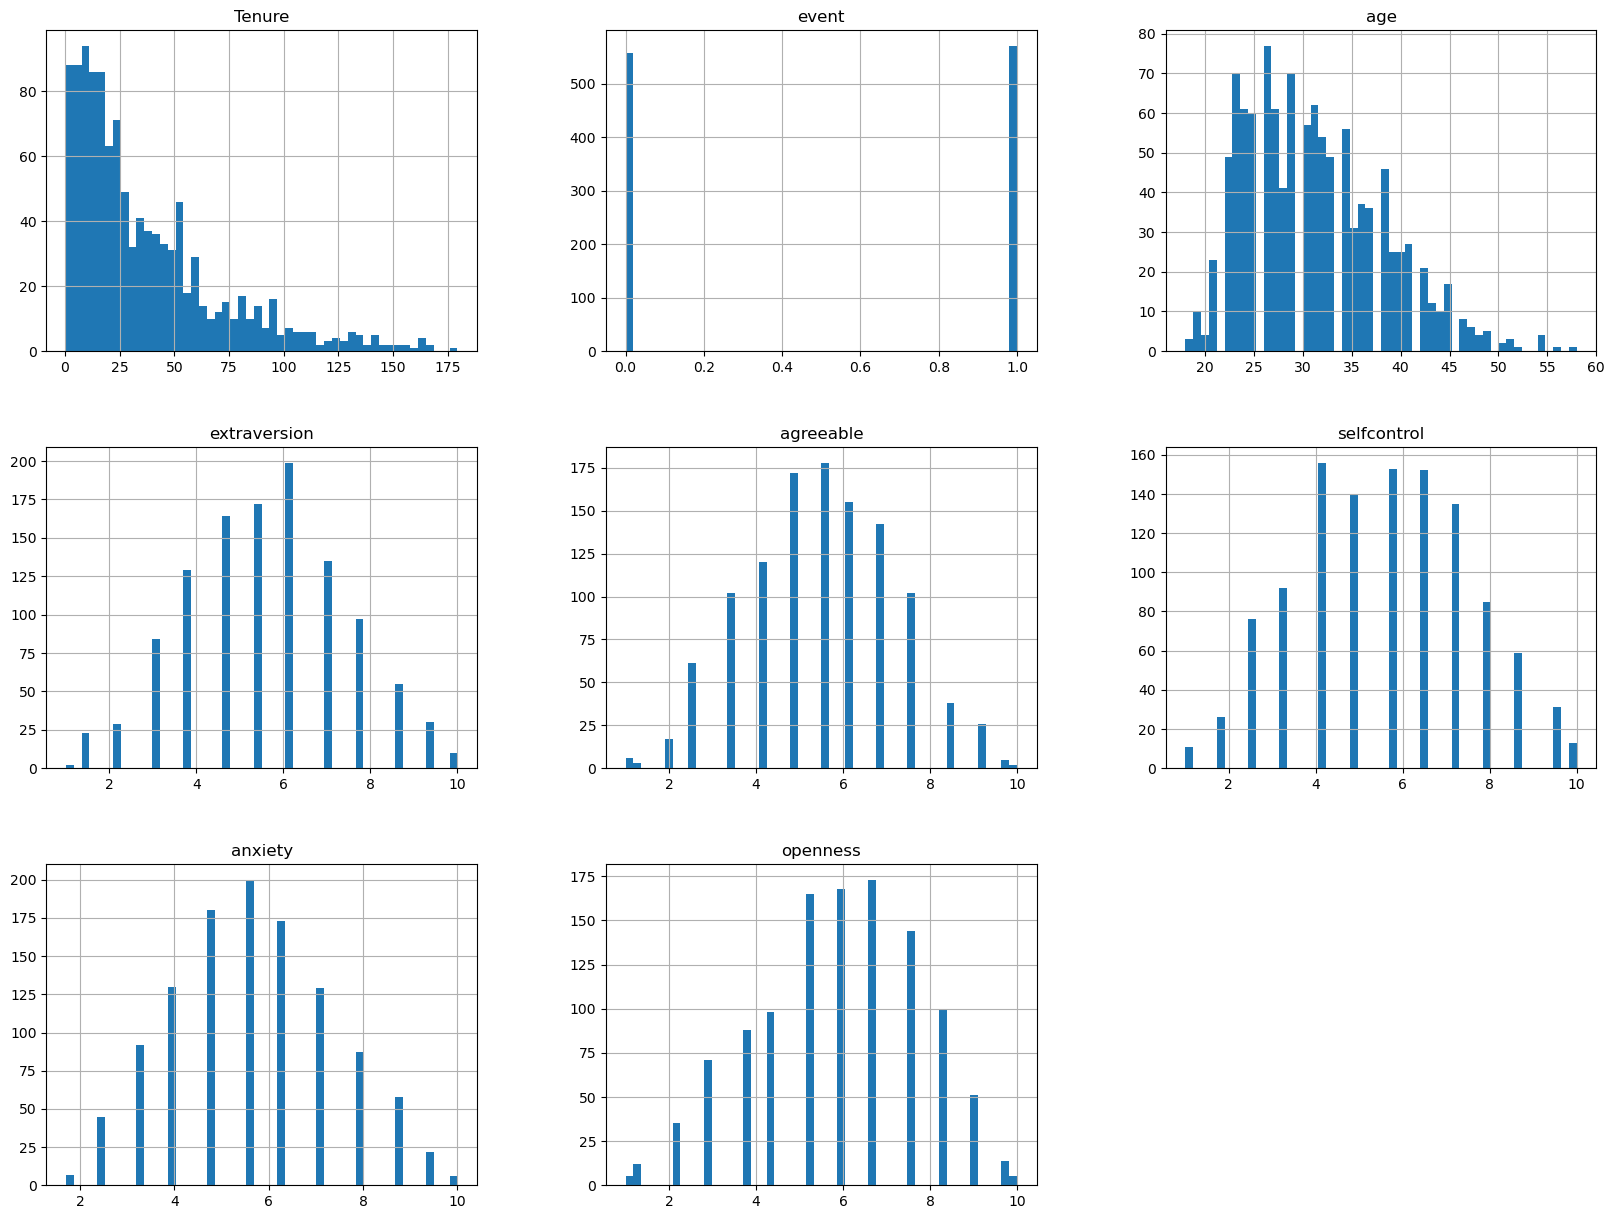

In [32]:
# plotting distributions of numeric columns

import matplotlib.pyplot as plt

turnover.hist(bins=50, figsize=(20,15))
plt.show()



All of the personality trait scores seem to have a fairly normal distribution. Age is slightly right skewed, with 75% of those in the dataset being under 36 years old. Although one may think we would exclude those in a higher age range, the company wants to hold on to their more experienced employees. In which, the most experienced employees would be in this age range. 

Tenure has a right skew as well, with 75% of the employees having a tenure of 51 months (4 years 3 months) or less. There is a large dip at 25 months and 50 months, which indicates employees may be leaving most often around 2 and 4 years with the company.

Event is a binary column, which is practically even between those who have left (1) and those who have not (0).

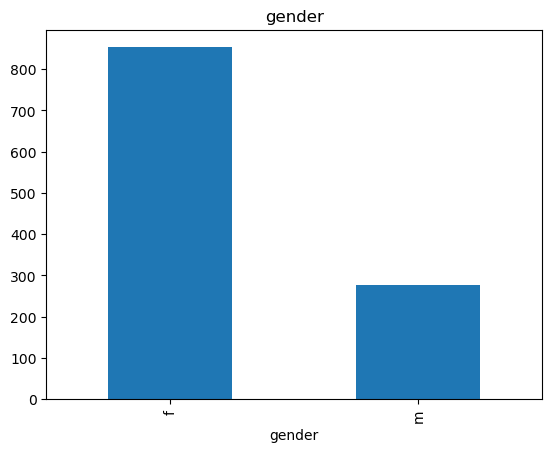

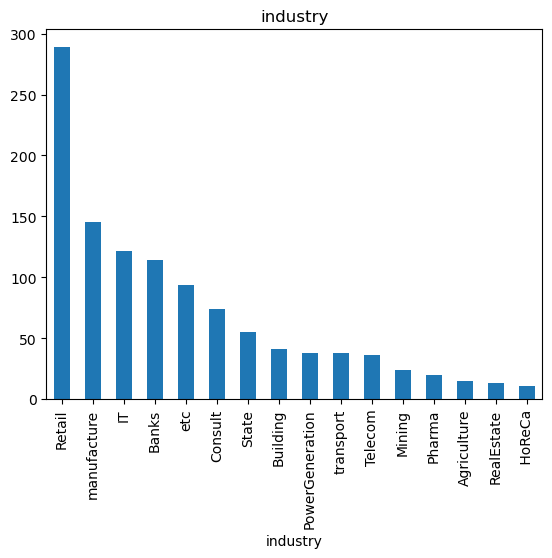

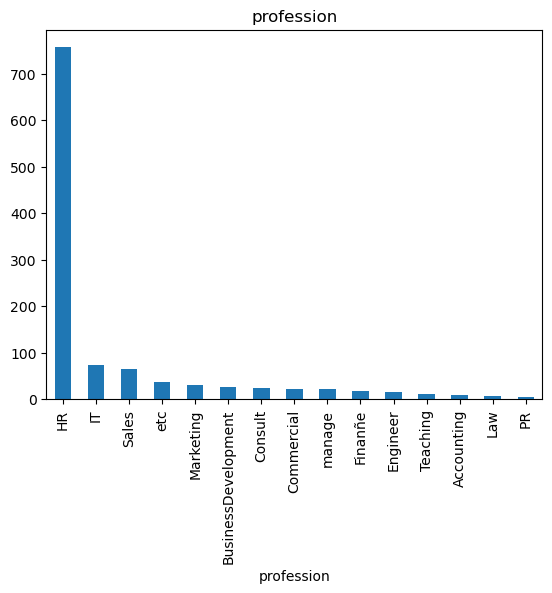

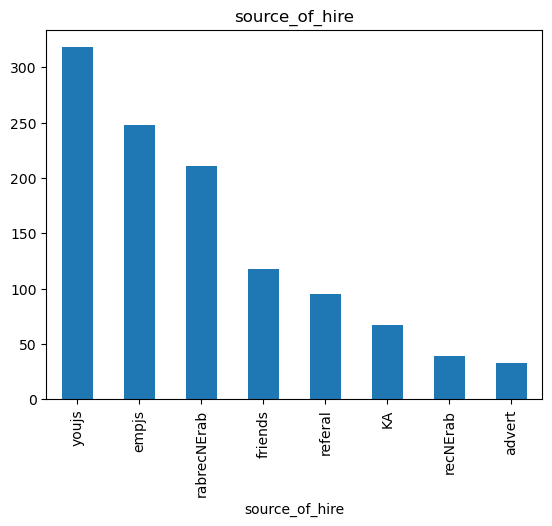

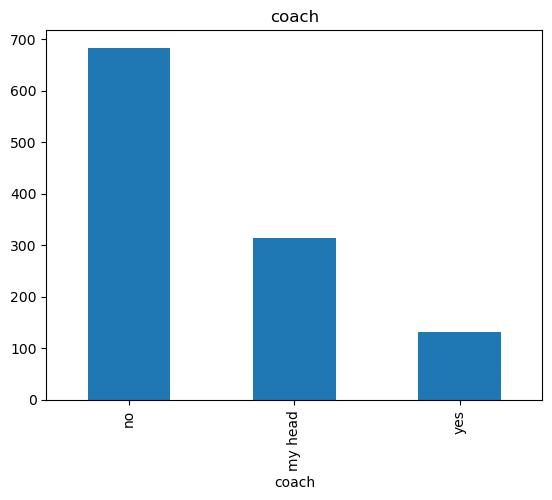

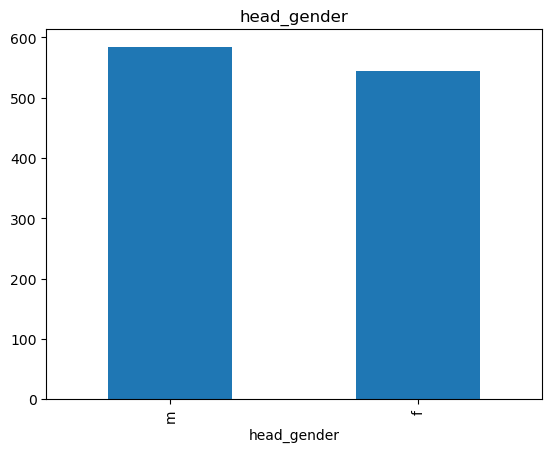

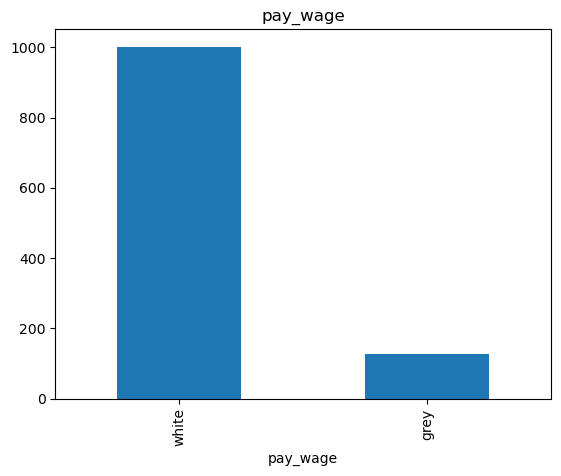

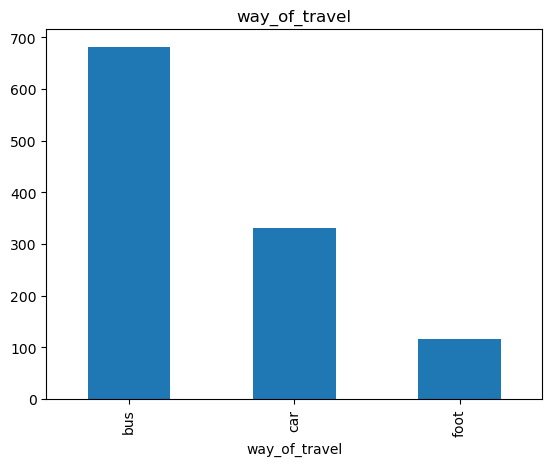

In [33]:
# plotting distributions of all non-numeric columns

for column in turnover.columns:
    if turnover[column].dtype == 'object':
        turnover[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.show()

        

In [41]:
# count number of male and female employees
turnover[turnover['gender']=='f']['gender'].count()/turnover[turnover['gender']=='m']['gender'].count()


3.0905797101449277

 The majority of the employees in the dataset are female, with females outnumbering males about 3:1. 

We need clarity for the industry feature, as I'm not sure if this means they came from this industry, or if this is a sub-industry within the company. I would assume the first, but this would be clarified with the customer. The profession feature also needs clarity with the customer, as I'm not sure if this means their profession in the company, or the profession they came from or are trained in. The most popular industry is retail, and the most popular department is HR, with HR making up the majority of the employees in the dataset.

Other than referral and friend, the majority of the sources of hire will need be clarified by the company, as the name is not self explanatory.

The coach column is not self explanatory, and will need to be clarified by the company. I do not know the column indicates if someone has a coach, or is a coach. The "my head" value is also unclear as well, as it could be a subset of yes meaning that they have a coach and it is the head of the department, section, etc. 

Head gender is fairly even, which is interesting as the majority of the employees are female, meaning proportionally men are more likely to be in a leadership position.

I would also need to clarify what the pay range names of white and grey are. I would assume that grey is a higher pay range because it is has less employees. 

The majority of the employees take the bus to work, which could be due to traffic, parking situation, and or the company's location. It could also mean that many employees cannot afford a car, or do not have a license.

## Creating bins for Age and Tenure

In [48]:
# create separate columns for bins of age, tenure, and personality trait

turnover['age_bin'] = pd.cut(turnover['age'], bins=[0, 20, 30, 40, 100], labels=['0-20', '20-30', '30-40', '40+'])

turnover['tenure_bin_years'] = pd.cut(turnover['Tenure'], bins=[0, 24, 48, 72, 96, 200], labels=['0-2', '2-4', '4-6', '6-8', '8+'])

In [49]:
# convert age bins and tenure bins to dummy variables

turnover = pd.get_dummies(turnover, columns=['age_bin', 'tenure_bin_years'])

turnover.head()

,Tenure,event,age,extraversion,agreeable,selfcontrol,anxiety,openness,gender_f,gender_m,...,way_of_travel_foot,age_bin_0-20,age_bin_20-30,age_bin_30-40,age_bin_40+,tenure_bin_years_0-2,tenure_bin_years_2-4,tenure_bin_years_4-6,tenure_bin_years_6-8,tenure_bin_years_8+
0,7.030801,1,35.0,6.2,4.1,5.7,7.1,8.3,False,True,...,False,False,False,True,False,True,False,False,False,False
1,22.965092,1,33.0,6.2,4.1,5.7,7.1,8.3,False,True,...,False,False,False,True,False,True,False,False,False,False
2,15.934292,1,35.0,6.2,6.2,2.6,4.8,8.3,True,False,...,False,False,False,True,False,True,False,False,False,False
3,15.934292,1,35.0,5.4,7.6,4.9,2.5,6.7,True,False,...,False,False,False,True,False,True,False,False,False,False
4,8.410678,1,32.0,3.0,4.1,8.0,7.1,3.7,False,True,...,False,False,False,True,False,True,False,False,False,False


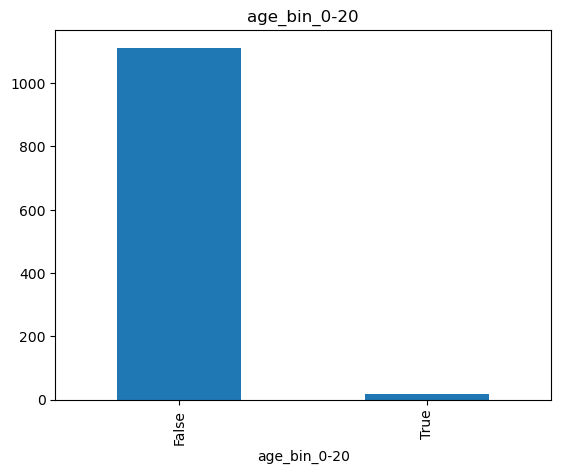

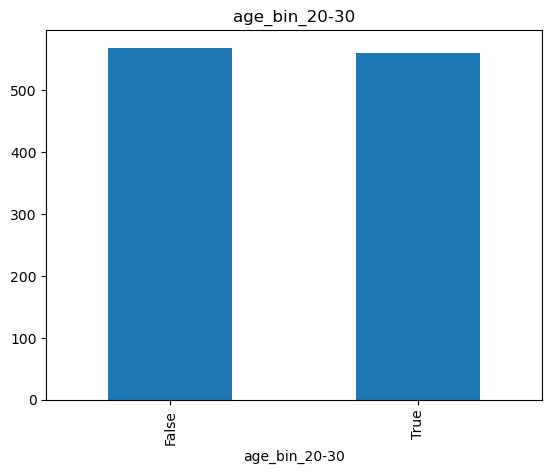

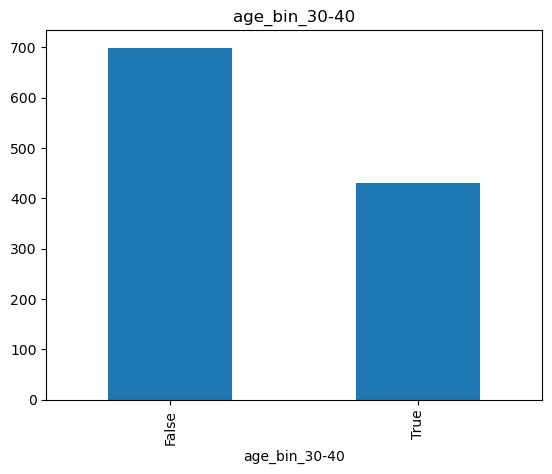

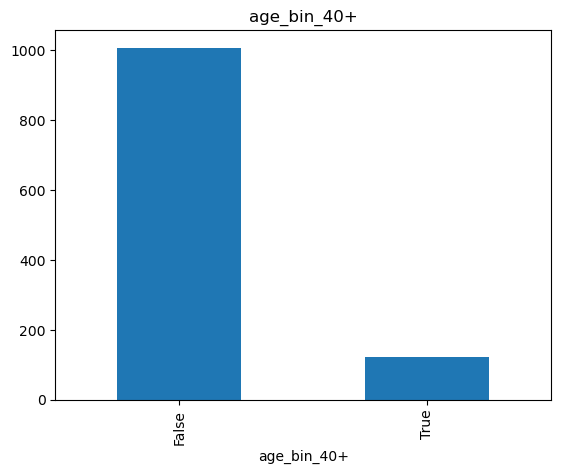

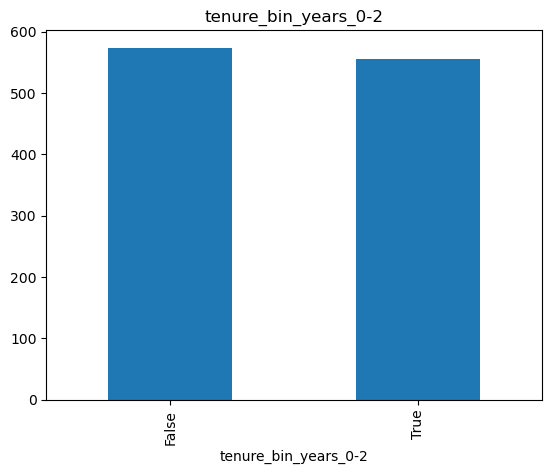

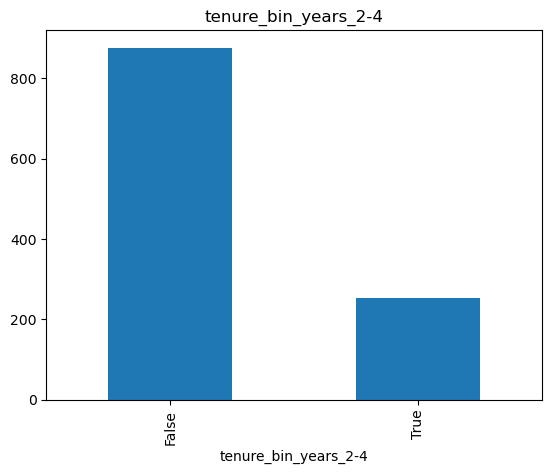

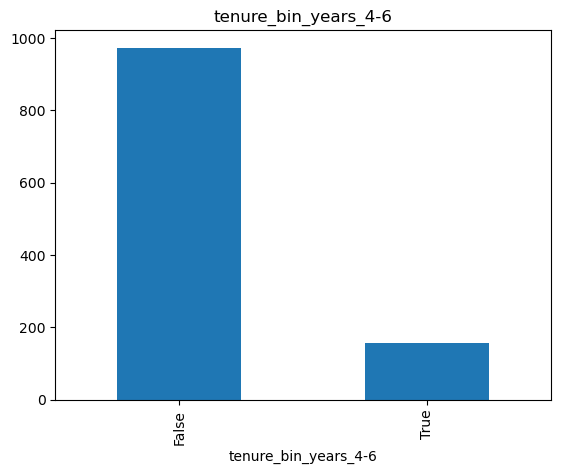

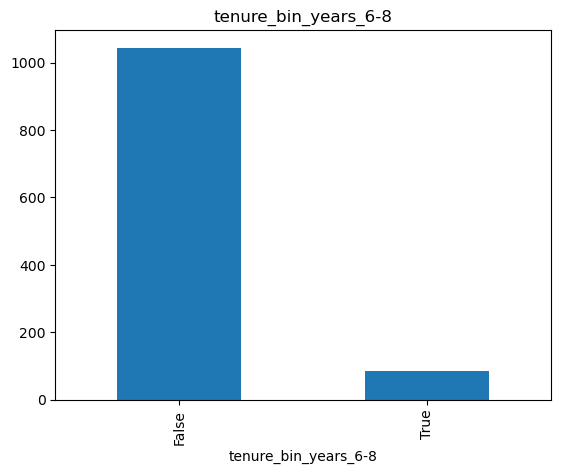

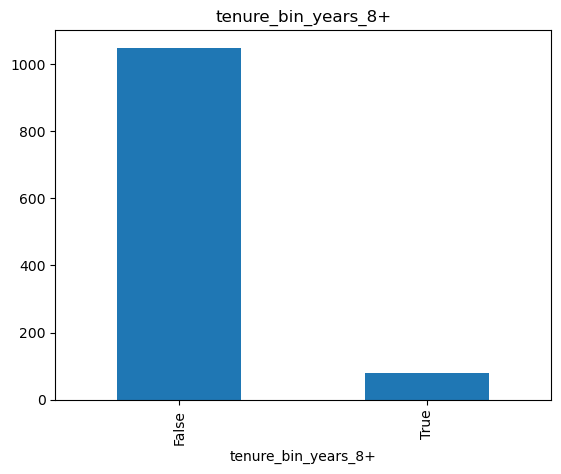

In [51]:
age_tenure_columns = ['age_bin_0-20', 'age_bin_20-30', 'age_bin_30-40', 'age_bin_40+',
       'tenure_bin_years_0-2', 'tenure_bin_years_2-4', 'tenure_bin_years_4-6',
       'tenure_bin_years_6-8', 'tenure_bin_years_8+']

for column in turnover[age_tenure_columns]:
        turnover[column].value_counts().plot(kind='bar')
        plt.title(column)
        plt.show()

The majority of the company is either between 20-30 years old and has a tenure of 0-2 years. As well, nearly a quarter of the company has both these characteristics, which is expected of many companies. 

In [52]:
# plot of how many employees are both between 0-2 years tenure and 20-30 years old

turnover[(turnover['age_bin_20-30']==1) & (turnover['tenure_bin_years_0-2']==1)].shape[0]

266

## Correlations with Event

In [53]:
# convert all non-numeric columns to numeric

turnover = pd.get_dummies(turnover)

turnover.head()

,Tenure,event,age,extraversion,agreeable,selfcontrol,anxiety,openness,gender_f,gender_m,...,way_of_travel_foot,age_bin_0-20,age_bin_20-30,age_bin_30-40,age_bin_40+,tenure_bin_years_0-2,tenure_bin_years_2-4,tenure_bin_years_4-6,tenure_bin_years_6-8,tenure_bin_years_8+
0,7.030801,1,35.0,6.2,4.1,5.7,7.1,8.3,False,True,...,False,False,False,True,False,True,False,False,False,False
1,22.965092,1,33.0,6.2,4.1,5.7,7.1,8.3,False,True,...,False,False,False,True,False,True,False,False,False,False
2,15.934292,1,35.0,6.2,6.2,2.6,4.8,8.3,True,False,...,False,False,False,True,False,True,False,False,False,False
3,15.934292,1,35.0,5.4,7.6,4.9,2.5,6.7,True,False,...,False,False,False,True,False,True,False,False,False,False
4,8.410678,1,32.0,3.0,4.1,8.0,7.1,3.7,False,True,...,False,False,False,True,False,True,False,False,False,False


In [57]:
# order the correlations and put in dataframe

correlations = pd.DataFrame(turnover.corr()['event'].sort_values())

correlations

,event
industry_IT,-0.158082
source_of_hire_friends,-0.102379
profession_HR,-0.097463
way_of_travel_foot,-0.094012
profession_IT,-0.088951
...,...
source_of_hire_referal,0.095426
industry_Building,0.097200
industry_Banks,0.101980
profession_Teaching,0.102462


Some of the most positively correlated variables with churn are below. This means they increase the likelihood of an employee leaving the company.
- Teaching Profession
- Banks Industry
- Building Industry
- Referral hires
- rabrecNErab hires

It is important to note that the Engineer profession has a fairly positive correlation with churn, which is a primary profession the company wants to retain.

Some of the most negatively correlated variables with churn are below. This means they decrease the likelihood of an employee leaving the company.
- IT Industry
- Source of Hire: Friend
- HR Profession
- Travel to work by foot
- IT Profession

HR is the most populated profession and has a negative correlation with churn. 

It's also important to note that the age bins do not have a very high correlation with churn, which is interesting as age is often a factor in churn. Also, all tenure bins except 0-2 have a negative correlation with churn, meaning they are more likely to stay with the company.


# Feature Selection

For the original model, I will keep all the columns in the dataset, excluding those that have been one-hot encoded. I originally stated I would those who's tenure is less than 12 months, but I think it is important to keep them for at least one model as the company is worried about churn in general, although there is an emphasis on their experienced CNC operators and engineers. 

In [58]:
turnover.columns

Index(['Tenure', 'event', 'age', 'extraversion', 'agreeable', 'selfcontrol',
       'anxiety', 'openness', 'gender_f', 'gender_m', 'industry_ HoReCa',
       'industry_Agriculture', 'industry_Banks', 'industry_Building',
       'industry_Consult', 'industry_IT', 'industry_Mining', 'industry_Pharma',
       'industry_PowerGeneration', 'industry_RealEstate', 'industry_Retail',
       'industry_State', 'industry_Telecom', 'industry_etc',
       'industry_manufacture', 'industry_transport', 'profession_Accounting',
       'profession_BusinessDevelopment', 'profession_Commercial',
       'profession_Consult', 'profession_Engineer', 'profession_Finanñe',
       'profession_HR', 'profession_IT', 'profession_Law',
       'profession_Marketing', 'profession_PR', 'profession_Sales',
       'profession_Teaching', 'profession_etc', 'profession_manage',
       'source_of_hire_KA', 'source_of_hire_advert', 'source_of_hire_empjs',
       'source_of_hire_friends', 'source_of_hire_rabrecNErab',
       

# Baseline Model

In [60]:
# Create a LOGISTICS REGRESSION model predicting churn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = turnover.drop(['event', 'age', 'Tenure'], axis=1)
y = turnover['event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy_score(y_test, y_pred)



0.6371681415929203

The accuracy of our initial model is respectable with a score of 63.7%. 

In [61]:
# show summary of model

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       161
           1       0.68      0.58      0.63       178

    accuracy                           0.64       339
   macro avg       0.64      0.64      0.64       339
weighted avg       0.64      0.64      0.64       339



If the company plans on using the model to identify those who are likely to leave, then event 1 recall is most important since we don't want the model to miss those who are likely to leave. However, it's also to identify features which correlate (positively or negatively) with churn, so the company can take action to generally retain employees.

In [62]:
# show confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[113,  48],
       [ 75, 103]])

In [71]:
logreg.coef_

# match coefficients to columns

coefficients = pd.DataFrame(logreg.coef_[0], index=X.columns, columns=['Coefficient'])

# sort coefficients in descending order

coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

coefficients

,Coefficient
profession_Teaching,1.209694
industry_Building,0.793207
industry_Banks,0.773629
profession_PR,0.679055
source_of_hire_referal,0.579903
...,...
tenure_bin_years_8+,-0.575780
industry_IT,-0.609362
source_of_hire_advert,-0.745904
profession_HR,-0.926515


# Optimal Model

In [74]:
# optimize model through LASSO regularization

from sklearn.linear_model import LogisticRegressionCV

logregcv = LogisticRegressionCV(max_iter=1000, penalty='l2', solver='liblinear')

logregcv.fit(X_train, y_train)

y_pred = logregcv.predict(X_test)

accuracy_score(y_test, y_pred)



0.6253687315634219

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       161
           1       0.67      0.57      0.61       178

    accuracy                           0.63       339
   macro avg       0.63      0.63      0.63       339
weighted avg       0.63      0.63      0.62       339

